# Final_Project NLP
Padam Bahadur Regmi
C0858265

# Problem statement :
There is a socail app in which people post the fun text and some motivational quotes. The dataset has many humor post and other are non humor post. I should use the database that has humor and non humor data and using the dataset I should build a model to correctly predict the humor and non humor post.

Since, this is a classification problem and we have a unstructured data text so,I am cleaning the text and vectorising it and then train two algorithms RandomForestClassifier and GradienBoost and analyse which model would classify the text with highest accuracy.

# Reading the data and importing libraries and packages

In [1]:

import pandas as pd
from matplotlib import pyplot  as plt
import numpy as np
%matplotlib inline
df = pd.read_csv('humor.csv')
df

,text,humor
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False
1,Watch: darvish gave hitter whiplash with slow ...,False
2,What do you call a turtle without its shell? d...,True
3,5 reasons the 2016 election feels so personal,False
4,"Pasco police shot mexican migrant from behind,...",False
...,...,...
199995,Conor maynard seamlessly fits old-school r&b h...,False
199996,How to you make holy water? you boil the hell ...,True
199997,How many optometrists does it take to screw in...,True
199998,Mcdonald's will officially kick off all-day br...,False


In [2]:
#list of unique sentiments
df['humor'].unique()

array([False,  True])

# Basic Data Exploration

In [3]:
#checking null values
df.isna().sum()

text     0
humor    0
dtype: int64

In [4]:
#checking missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    200000 non-null  object
 1   humor   200000 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 1.7+ MB


In [5]:
#taking only 2000 rows from 20000 rows as algorithm take more than 5 hours if I take all the dataset so, I am selecting the sample of 2000 rows
df1 = df.loc[:2000,:]
df1.columns = ['text','label']
df1

,text,label
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False
1,Watch: darvish gave hitter whiplash with slow ...,False
2,What do you call a turtle without its shell? d...,True
3,5 reasons the 2016 election feels so personal,False
4,"Pasco police shot mexican migrant from behind,...",False
...,...,...
1996,U.s. women's hockey players reach deal to end ...,False
1997,"Which came first, the chicken or the egg? the ...",True
1998,Chinese mine boss apparently drowns himself af...,False
1999,Student loses hope after too much testing (video),False


# Exploratory data analysis

In [6]:
#changing true to humor and false to non humor
df1['label'] = df1['label'].replace(True,'humor')
df1['label'] = df1['label'].replace(False,'Non humor')
df1

C:\Users\Padam\AppData\Local\Temp/ipykernel_7572/2073448647.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['label'] = df1['label'].replace(True,'humor')
C:\Users\Padam\AppData\Local\Temp/ipykernel_7572/2073448647.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['label'] = df1['label'].replace(False,'Non humor')


,text,label
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",Non humor
1,Watch: darvish gave hitter whiplash with slow ...,Non humor
2,What do you call a turtle without its shell? d...,humor
3,5 reasons the 2016 election feels so personal,Non humor
4,"Pasco police shot mexican migrant from behind,...",Non humor
...,...,...
1996,U.s. women's hockey players reach deal to end ...,Non humor
1997,"Which came first, the chicken or the egg? the ...",humor
1998,Chinese mine boss apparently drowns himself af...,Non humor
1999,Student loses hope after too much testing (video),Non humor


In [7]:
df1['label'].value_counts()

humor        1028
Non humor     973
Name: label, dtype: int64

C:\Users\Padam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


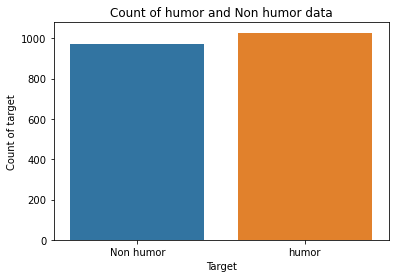

In [8]:
#plotting count of humor and non humor text
import seaborn as sns
sns.countplot(df1['label'])
plt.xlabel('Target')
plt.ylabel('Count of target')
plt.title('Count of humor and Non humor data')
plt.show()

In [9]:
#counting the length of each text length
df1['content_len'] = df1['text'].apply(lambda x : len(x)-x.count(" "))
df1.head()

C:\Users\Padam\AppData\Local\Temp/ipykernel_7572/2379785659.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['content_len'] = df1['text'].apply(lambda x : len(x)-x.count(" "))


,text,label,content_len
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",Non humor,44
1,Watch: darvish gave hitter whiplash with slow ...,Non humor,44
2,What do you call a turtle without its shell? d...,humor,41
3,5 reasons the 2016 election feels so personal,Non humor,38
4,"Pasco police shot mexican migrant from behind,...",Non humor,55


In [10]:
import re
import string
import nltk
pd.set_option('display.max_colwidth', 100)

In [11]:
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

In [12]:
#creating function to clean the text
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [13]:
df1['cleaned_text'] = df1['text'].apply(lambda x: clean_text(x))
df1

C:\Users\Padam\AppData\Local\Temp/ipykernel_7572/4274508932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['cleaned_text'] = df1['text'].apply(lambda x: clean_text(x))


,text,label,content_len,cleaned_text
0,"Joe biden rules out 2020 bid: 'guys, i'm not running'",Non humor,44,"[joe, biden, rule, 2020, bid, guy, im, run]"
1,Watch: darvish gave hitter whiplash with slow pitch,Non humor,44,"[watch, darvish, gave, hitter, whiplash, slow, pitch]"
2,What do you call a turtle without its shell? dead.,humor,41,"[call, turtl, without, shell, dead]"
3,5 reasons the 2016 election feels so personal,Non humor,38,"[5, reason, 2016, elect, feel, person]"
4,"Pasco police shot mexican migrant from behind, new autopsy shows",Non humor,55,"[pasco, polic, shot, mexican, migrant, behind, new, autopsi, show]"
...,...,...,...,...
1996,U.s. women's hockey players reach deal to end fair pay boycott,Non humor,52,"[us, women, hockey, player, reach, deal, end, fair, pay, boycott]"
1997,"Which came first, the chicken or the egg? the rooster.",humor,45,"[came, first, chicken, egg, rooster]"
1998,Chinese mine boss apparently drowns himself after deadly collapse,Non humor,57,"[chines, mine, boss, appar, drown, deadli, collaps]"
1999,Student loses hope after too much testing (video),Non humor,42,"[student, lose, hope, much, test, video]"


(array([ 21.,  85., 131., 116., 168., 159., 114., 128.,  83.,  23.]),
 array([29. , 34.7, 40.4, 46.1, 51.8, 57.5, 63.2, 68.9, 74.6, 80.3, 86. ]),
 <BarContainer object of 10 artists>)

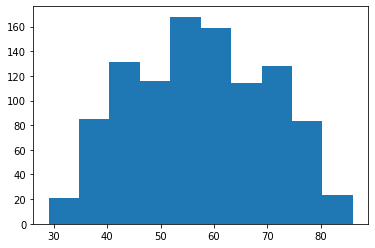

In [14]:
#plotting the histogram of humor text with content length
plt.hist(df1[df1['label']=='humor']['content_len'])

(array([ 13.,  36., 105., 145., 188., 196., 129.,  93.,  50.,  18.]),
 array([24. , 30.2, 36.4, 42.6, 48.8, 55. , 61.2, 67.4, 73.6, 79.8, 86. ]),
 <BarContainer object of 10 artists>)

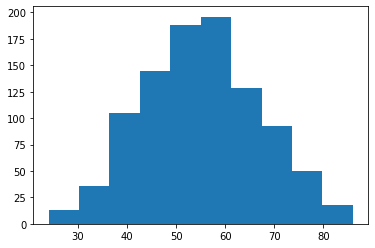

In [15]:
#plotting the histogram of non-humor text with content length
plt.hist(df1[df1['label']=='Non humor']['content_len'])

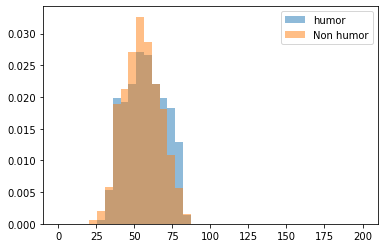

In [16]:
#observing the text length of humor and non-humor text
bins = np.linspace(0, 200, 40)

plt.hist(df1[df1['label']=='humor']['content_len'], bins, alpha=0.5, density=True,   label='humor')

plt.hist(df1[df1['label']=='Non humor']['content_len'], bins, alpha =0.5, density=True,  label='Non humor')

plt.legend(loc='upper right')

plt.show()

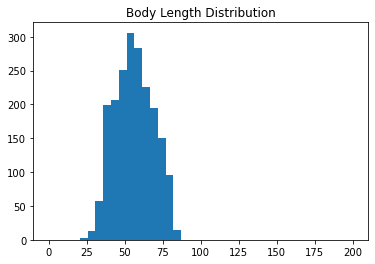

In [17]:
#Body length distribution
bins = np.linspace(0, 200, 40)

plt.hist(df1['content_len'], bins)
plt.title("Body Length Distribution")
plt.show()

In [18]:
#defining function to count the punctuation
import string
def count_punc(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(" ")),3)*100
df1['punc_percent'] = df1['text'].apply(lambda x: count_punc(x))
df1.head()

C:\Users\Padam\AppData\Local\Temp/ipykernel_7572/3611968733.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['punc_percent'] = df1['text'].apply(lambda x: count_punc(x))


,text,label,content_len,cleaned_text,punc_percent
0,"Joe biden rules out 2020 bid: 'guys, i'm not running'",Non humor,44,"[joe, biden, rule, 2020, bid, guy, im, run]",11.4
1,Watch: darvish gave hitter whiplash with slow pitch,Non humor,44,"[watch, darvish, gave, hitter, whiplash, slow, pitch]",2.3
2,What do you call a turtle without its shell? dead.,humor,41,"[call, turtl, without, shell, dead]",4.9
3,5 reasons the 2016 election feels so personal,Non humor,38,"[5, reason, 2016, elect, feel, person]",0.0
4,"Pasco police shot mexican migrant from behind, new autopsy shows",Non humor,55,"[pasco, polic, shot, mexican, migrant, behind, new, autopsi, show]",1.8


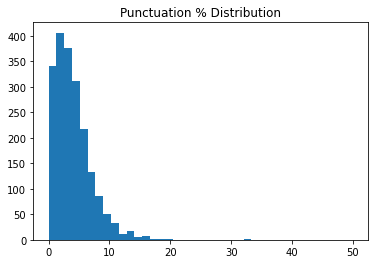

In [19]:
bins = np.linspace(0, 50, 40)

plt.hist(df1['punc_percent'], bins)
plt.title("Punctuation % Distribution")
plt.show()

# vectorisation and converting cleaned text into bag of words using TF-IDF:


In [20]:
#Appplying tf-idf vectorisation to convert the text in vectors

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(df1['text'])
X_tfidf_feat = pd.concat([df1['content_len'], df1['punc_percent'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_tfidf_feat.head()

,content_len,punc_percent,0,1,2,3,4,5,6,7,...,4987,4988,4989,4990,4991,4992,4993,4994,4995,4996
0,44,11.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,44,2.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,41,4.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,55,1.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Split the datasets into train and test subsets

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf_feat, df1['label'], test_size=0.2)

# Buiding model and prediction

In [23]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score

# Model No 1: RandomForestClassifier

In [33]:
#prediction:
rf = RandomForestClassifier(n_estimators=100, max_depth=60, n_jobs=-1)
rf_model = rf.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_pred_rf

array(['Non humor', 'humor', 'humor', 'Non humor', 'Non humor', 'humor',
       'Non humor', 'Non humor', 'Non humor', 'Non humor', 'Non humor',
       'Non humor', 'Non humor', 'Non humor', 'humor', 'Non humor',
       'Non humor', 'humor', 'humor', 'Non humor', 'humor', 'humor',
       'Non humor', 'humor', 'humor', 'humor', 'Non humor', 'humor',
       'humor', 'Non humor', 'Non humor', 'Non humor', 'Non humor',
       'humor', 'humor', 'Non humor', 'humor', 'Non humor', 'Non humor',
       'Non humor', 'humor', 'humor', 'Non humor', 'humor', 'humor',
       'Non humor', 'Non humor', 'Non humor', 'Non humor', 'humor',
       'humor', 'humor', 'Non humor', 'Non humor', 'Non humor', 'humor',
       'humor', 'Non humor', 'humor', 'humor', 'Non humor', 'humor',
       'Non humor', 'humor', 'Non humor', 'Non humor', 'humor', 'humor',
       'humor', 'Non humor', 'Non humor', 'humor', 'humor', 'Non humor',
       'humor', 'Non humor', 'humor', 'humor', 'Non humor', 'humor',
       'humor'

In [25]:
def train_RF(n_est, depth):
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    rf_model = rf.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred_rf, pos_label='humor', average='binary')
    print('Est: {} / Depth: {} ==== Precision: {} / Recall: {} / Accuracy: {}'.format(
    n_est, depth, round(precision, 3), round(recall, 3), 
    round((y_pred_rf==y_test).sum() / len(y_pred_rf), 3)))

    

In [26]:
for n_est in [10, 100, 150]:
    for depth in[30, 60, 90, None]:
        train_RF(n_est, depth)

Est: 10 / Depth: 30 ==== Precision: 0.763 / Recall: 0.822 / Accuracy: 0.776
Est: 10 / Depth: 60 ==== Precision: 0.79 / Recall: 0.812 / Accuracy: 0.791
Est: 10 / Depth: 90 ==== Precision: 0.738 / Recall: 0.841 / Accuracy: 0.763
Est: 10 / Depth: None ==== Precision: 0.799 / Recall: 0.784 / Accuracy: 0.786
Est: 100 / Depth: 30 ==== Precision: 0.81 / Recall: 0.841 / Accuracy: 0.815
Est: 100 / Depth: 60 ==== Precision: 0.791 / Recall: 0.837 / Accuracy: 0.8
Est: 100 / Depth: 90 ==== Precision: 0.794 / Recall: 0.851 / Accuracy: 0.808
Est: 100 / Depth: None ==== Precision: 0.827 / Recall: 0.851 / Accuracy: 0.83
Est: 150 / Depth: 30 ==== Precision: 0.808 / Recall: 0.832 / Accuracy: 0.81
Est: 150 / Depth: 60 ==== Precision: 0.789 / Recall: 0.846 / Accuracy: 0.803
Est: 150 / Depth: 90 ==== Precision: 0.779 / Recall: 0.846 / Accuracy: 0.796
Est: 150 / Depth: None ==== Precision: 0.777 / Recall: 0.856 / Accuracy: 0.798


In [27]:
#USing gridsearch
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
         'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X_tfidf_feat, df1['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending =False) [0:5]


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,10.597035,0.136291,0.099995,0.007647,None,300,"{'max_depth': None, 'n_estimators': 300}",0.825436,0.8075,0.7850,0.7825,0.7825,0.796587,0.017219,1
8,13.151861,0.128650,0.146233,0.019361,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.827930,0.8025,0.7875,0.7775,0.7800,0.795086,0.018591,2
10,7.574638,0.200856,0.092725,0.024287,None,150,"{'max_depth': None, 'n_estimators': 150}",0.830424,0.7975,0.7675,0.7825,0.7875,0.793085,0.021031,3
7,7.308154,0.394220,0.131352,0.044325,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.817955,0.7975,0.7825,0.7850,0.7800,0.792591,0.014039,4
5,10.993092,0.383835,0.147529,0.029532,60,300,"{'max_depth': 60, 'n_estimators': 300}",0.817955,0.7900,0.7775,0.7775,0.7775,0.788091,0.015697,5


# Model no 2: GradientBoostingClassifier

In [28]:
#prediction for gradient boost
gb = GradientBoostingClassifier(n_estimators=100, max_depth=60, learning_rate=1)
gb_model = gb.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)
y_pred

array(['Non humor', 'humor', 'humor', 'Non humor', 'Non humor', 'humor',
       'Non humor', 'Non humor', 'humor', 'Non humor', 'Non humor',
       'Non humor', 'Non humor', 'Non humor', 'Non humor', 'Non humor',
       'Non humor', 'humor', 'humor', 'Non humor', 'humor', 'humor',
       'Non humor', 'Non humor', 'humor', 'humor', 'Non humor', 'humor',
       'humor', 'Non humor', 'Non humor', 'Non humor', 'Non humor',
       'humor', 'humor', 'Non humor', 'Non humor', 'Non humor',
       'Non humor', 'Non humor', 'humor', 'humor', 'Non humor', 'humor',
       'humor', 'Non humor', 'Non humor', 'Non humor', 'Non humor',
       'humor', 'Non humor', 'humor', 'Non humor', 'Non humor',
       'Non humor', 'humor', 'humor', 'Non humor', 'Non humor', 'humor',
       'Non humor', 'humor', 'Non humor', 'humor', 'humor', 'Non humor',
       'humor', 'Non humor', 'humor', 'Non humor', 'Non humor', 'humor',
       'humor', 'Non humor', 'Non humor', 'Non humor', 'humor',
       'Non humor', 'Non 

In [29]:
#gadientboost
def train_GB(est, max_depth, lr):
    gb = GradientBoostingClassifier(n_estimators=est, max_depth=max_depth, learning_rate=lr)
    gb_model = gb.fit(X_train, y_train)
    y_pred = gb_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label='humor', average='binary')
    print('Est: {} / Depth: {} / LR: {}  ==== Precision: {} / Recall: {} / Accuracy: {}'.format(
    est, max_depth, lr, round(precision, 3), round(recall, 3), 
    round((y_pred==y_test).sum() / len(y_pred), 3)))

In [30]:

for n_est in [50, 100, 150]:
    for max_depth in [3, 7, 11, 15]:
        for lr in [0.01, 0.1, 1]:
            train_GB(n_est, max_depth, lr)

Est: 50 / Depth: 3 / LR: 0.01  ==== Precision: 0.718 / Recall: 0.846 / Accuracy: 0.748
Est: 50 / Depth: 3 / LR: 0.1  ==== Precision: 0.751 / Recall: 0.798 / Accuracy: 0.758
Est: 50 / Depth: 3 / LR: 1  ==== Precision: 0.796 / Recall: 0.731 / Accuracy: 0.763
Est: 50 / Depth: 7 / LR: 0.01  ==== Precision: 0.732 / Recall: 0.841 / Accuracy: 0.758
Est: 50 / Depth: 7 / LR: 0.1  ==== Precision: 0.763 / Recall: 0.788 / Accuracy: 0.763
Est: 50 / Depth: 7 / LR: 1  ==== Precision: 0.756 / Recall: 0.745 / Accuracy: 0.743
Est: 50 / Depth: 11 / LR: 0.01  ==== Precision: 0.74 / Recall: 0.808 / Accuracy: 0.753
Est: 50 / Depth: 11 / LR: 0.1  ==== Precision: 0.766 / Recall: 0.803 / Accuracy: 0.771
Est: 50 / Depth: 11 / LR: 1  ==== Precision: 0.798 / Recall: 0.76 / Accuracy: 0.776
Est: 50 / Depth: 15 / LR: 0.01  ==== Precision: 0.763 / Recall: 0.803 / Accuracy: 0.768
Est: 50 / Depth: 15 / LR: 0.1  ==== Precision: 0.78 / Recall: 0.803 / Accuracy: 0.781
Est: 50 / Depth: 15 / LR: 1  ==== Precision: 0.79 / Re

In [31]:
gb = GradientBoostingClassifier()
param = {
    'n_estimators': [100, 150],
    'max_depth': [7, 11, 15],
    'learning_rate': [0.1]
    
}

In [32]:
gs = GridSearchCV(gb, param, cv=5, n_jobs=-1)
cv_fit = gs.fit(X_tfidf_feat, df1['label'])
pd.DataFrame(cv_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,50.961991,0.483930,0.077810,0.005637,0.1,7,150,"{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150}",0.790524,0.8100,0.7700,0.7775,0.7525,0.780105,0.019356,1
3,76.087467,0.360833,0.057108,0.008506,0.1,11,150,"{'learning_rate': 0.1, 'max_depth': 11, 'n_estimators': 150}",0.798005,0.8000,0.7600,0.7825,0.7600,0.780101,0.017495,2
5,79.445285,0.716652,0.034494,0.006445,0.1,15,150,"{'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 150}",0.795511,0.8000,0.7625,0.7700,0.7550,0.776602,0.017967,3
2,51.091680,0.813296,0.070994,0.007122,0.1,11,100,"{'learning_rate': 0.1, 'max_depth': 11, 'n_estimators': 100}",0.790524,0.7925,0.7625,0.7750,0.7525,0.774605,0.015550,4
0,31.832864,0.383510,0.074602,0.008409,0.1,7,100,"{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}",0.788030,0.7950,0.7675,0.7650,0.7525,0.773606,0.015637,5


# Conclusion and model selection:

1.RandomforestClassification:
    On applying this algorithm to the cleaned and vectorised data using different no of estimator and depth, I came to know that the highest precision,recall and accuracy of the model are 82.7%,85.6% andd 83%. Again ,on applting gridsearch on the same model, it gives the highest test_mean_score to be 79.6% with highest score of 82.5% using 300 estimators and none depth.
  
2. GradientBoosting Classifier:
    On applying this algorithm to the same tf-idf vectorised data using different no of extimators, depth and learning rate, I came to know that the highest precision, recall and accuracy of the model are 80.4%, 84.6% and 79.1%. Again on applying gridsearch on the same model, its give the highest test_mean_score to be 78% with highest split score of 79% using learning rat 0.1, max depth 7 and no of estimator of 150.
 
 Since, our dataset is balanced dataset as it contains nearly equal number of humor and non humor text, so accuracy would be the best metrics to evaluate the model performance. Among two, RandomforestClassifier gives us the best accuracy of 82.5% on applying grid search using 300 estimators and none depth. So, I would choose random forest classifier algorithm to build a model in my humor analysis dataset.
 
 Furthermore, I only used about 10% data of the total text to reduce the time to build my model, If I could used all or more than 50% of the data then, my model performance would increase further.

# Final model: RandomForestClassifier with 300 estimators and none depth